## Importing libraries

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df = pd.read_csv('melb_data.csv')
#pd.read_csv('julian_code_results.csv')
df

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

## clustering:

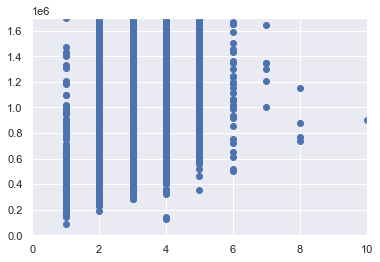

In [53]:
#Plotting the data Rooms vs Price
plt.scatter(df['Rooms'],df['Price'])
plt.xlim(0,10)
plt.ylim(0,1700000)
plt.show()

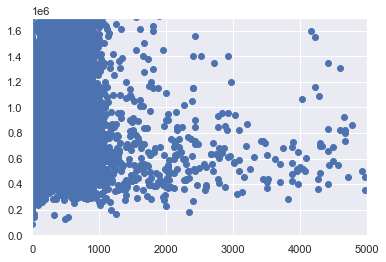

In [54]:
#Plotting the data Landsize vs Price
plt.scatter(df['Landsize'],df['Price'])
plt.xlim(0,5000)
plt.ylim(0,1700000)
plt.show()

In [55]:
#selecting a feature
x = df.iloc[:,np.r_[2,4]] # 1t for rows and second for columns
x

Rooms      Price
0          2  1480000.0
1          2  1035000.0
2          3  1465000.0
3          3   850000.0
4          4  1600000.0
...      ...        ...
13575      4  1245000.0
13576      3  1031000.0
13577      3  1170000.0
13578      4  2500000.0
13579      4  1285000.0

[13580 rows x 2 columns]

In [56]:
#Clustering
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [57]:
#clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 0, ..., 0, 2, 0], dtype=int32)

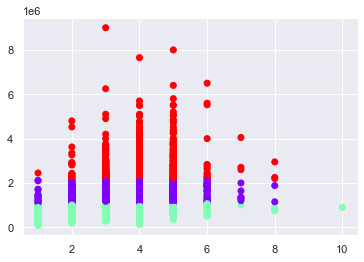

In [58]:
#Clustering Results Rooms vs Price
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Rooms'],data_with_clusters['Price'],c=data_with_clusters['Clusters'],cmap='rainbow')

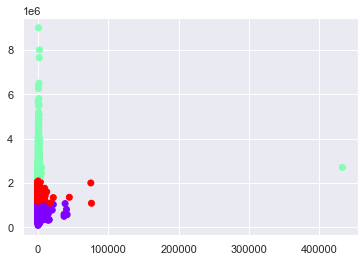

In [59]:
# Landzize vs price with outlier
x = df.iloc[:,np.r_[13,4]] 
identified_clusters = kmeans.fit_predict(x)


data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Landsize'],data_with_clusters['Price'],c=data_with_clusters['Clusters'],cmap='rainbow')

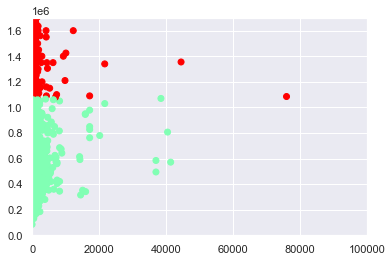

In [60]:
x = df.iloc[:,np.r_[13,4]] # Landzize vs price without outlier
identified_clusters = kmeans.fit_predict(x)
plt.xlim(0,100000)
plt.ylim(0,1700000)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Landsize'],data_with_clusters['Price'],c=data_with_clusters['Clusters'],cmap='rainbow')

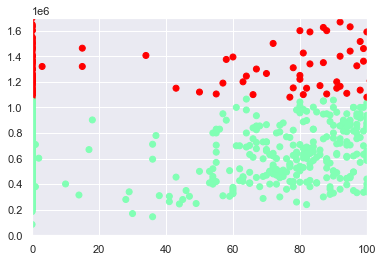

In [61]:
x = df.iloc[:,np.r_[13,4]] # Landzize vs price 0-100 section
identified_clusters = kmeans.fit_predict(x)
plt.xlim(0,100)
plt.ylim(0,1700000)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Landsize'],data_with_clusters['Price'],c=data_with_clusters['Clusters'],cmap='rainbow')

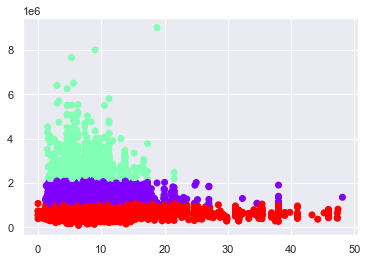

In [63]:
# Distance vs price
x = df.iloc[:,np.r_[8,4]] 
identified_clusters = kmeans.fit_predict(x)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Distance'],data_with_clusters['Price'],c=data_with_clusters['Clusters'],cmap='rainbow')